In [1]:
import glob
import os

import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr

import cartopy
import cartopy.crs as ccrs
from cartopy.io import shapereader
import shapely

import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
plt.rcParams['svg.fonttype'] = 'none'


In [44]:
file = '/cluster/work/cpesm/shared/euro-calliope-update/runs_temperature.nc'
foo = xr.open_mfdataset(file)
points = [shapely.geometry.Point(xy) for xy in zip(foo.lon.values, foo.lat.values)]
foo

/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


<xarray.Dataset>
Dimensions:      (site: 2751, time: 166560)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
  * site         (site) object '20' '21' '22' '23' ... '2768' '2769' '2770'
Data variables:
    temperature  (site, time) float32 dask.array<shape=(2751, 166560), chunksize=(2751, 166560)>
    weight       (site) float64 dask.array<shape=(2751,), chunksize=(2751,)>
    site_id      (site) float64 dask.array<shape=(2751,), chunksize=(2751,)>
    lat          (site) float64 dask.array<shape=(2751,), chunksize=(2751,)>
    lon          (site) float64 dask.array<shape=(2751,), chunksize=(2751,)>
    dataset      (site) object dask.array<shape=(2751,), chunksize=(2751,)>
    interpolate  (site) bool dask.array<shape=(2751,), chunksize=(2751,)>
    date_from    (site) object dask.array<shape=(2751,), chunksize=(2751,)>
    date_to      (site) object dask.array<shape=(2751,), chunksize=(2751,)>
    var_t2m      (site) bool dask.array<shape=(2751,)

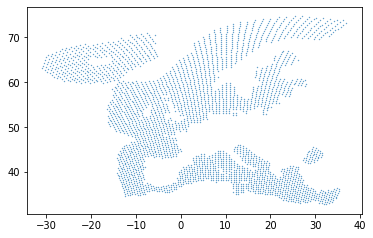

In [35]:
gpd.GeoDataFrame(geometry=points).plot(markersize=0.1)

In [36]:
foo

<xarray.Dataset>
Dimensions:      (site: 3209, time: 166560)
Coordinates:
  * time         (time) datetime64[ns] 2000-01-01 ... 2018-12-31T23:00:00
  * site         (site) object '0' '1' '2' '3' ... '2966' '2967' '2968' '2969'
Data variables:
    electricity  (site, time) float64 dask.array<shape=(3209, 166560), chunksize=(3209, 166560)>
    weight       (site) int64 dask.array<shape=(3209,), chunksize=(3209,)>
    site_id      (site) int64 dask.array<shape=(3209,), chunksize=(3209,)>
    lat          (site) float64 dask.array<shape=(3209,), chunksize=(3209,)>
    lon          (site) float64 dask.array<shape=(3209,), chunksize=(3209,)>
    height       (site) int64 dask.array<shape=(3209,), chunksize=(3209,)>
    turbine      (site) object dask.array<shape=(3209,), chunksize=(3209,)>
    dataset      (site) object dask.array<shape=(3209,), chunksize=(3209,)>
    interpolate  (site) bool dask.array<shape=(3209,), chunksize=(3209,)>
    date_from    (site) object dask.array<shape=(3209,)

In [39]:
file = '/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/data/capacityfactors/wind-offshore.nc'
foo = xr.open_mfdataset(file)
sorted(foo.site_id.values)

/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [31]:
pd.read_csv('/cluster/work/cpesm/shared/input/ninja-input-wind-onshore.csv')

,sim_id,weight,site_id,lat,long,hub_height,turbine
0,20,1.0,20.0,36.770229,-9.007817,105.0,vestas v90 2000
1,21,1.0,21.0,37.208813,-9.130510,105.0,vestas v90 2000
2,22,1.0,22.0,38.521474,-9.512217,105.0,vestas v90 2000
3,23,1.0,23.0,38.957996,-9.644179,105.0,vestas v90 2000
4,24,1.0,24.0,39.394002,-9.778598,105.0,vestas v90 2000
5,25,1.0,25.0,36.880386,-8.463048,105.0,vestas v90 2000
6,26,1.0,26.0,37.319782,-8.582603,105.0,vestas v90 2000
7,27,1.0,27.0,37.758678,-8.704346,105.0,vestas v90 2000
8,28,1.0,28.0,38.197073,-8.828326,105.0,vestas v90 2000
9,29,1.0,29.0,38.634970,-8.954599,105.0,vestas v90 2000


In [50]:
for file/cluster/work/cpesm/shared/euro-calliope-update/e', 'ninja-input-pv']:
    filepath = f'/cluster/work/cpesm/brynmorp/euro-spores/land-eligibility/build/capacityfactors/{file}.csv'
    foo = pd.read_csv(filepath, index_col=0, header=0)
    baz = foo.where(~((foo.lat<40) & (foo.long <-15))).dropna()
    baz.to_csv(filepath)
#

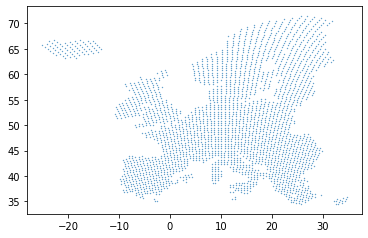

In [48]:
bar.plot(markersize=0.1)

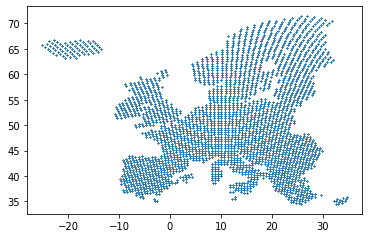

In [51]:
foo = pd.read_csv(filepath, index_col=0, header=0)
bar = gpd.GeoDataFrame(geometry=[shapely.geometry.Point(xy) for xy in zip(baz.long.values, baz.lat.values)], crs='epsg:4326')
bar.plot(markersize=0.1)

In [53]:
foo

,weight,site_id,lat,long,tilt,orientation,azim,pr
sim_id,,,,,,,,
20_E_18,0.057820,20.0,36.770229,-9.007817,18.155579,E,90.0,0.9
20_E_26,0.046857,20.0,36.770229,-9.007817,25.863758,E,90.0,0.9
20_E_33,0.043226,20.0,36.770229,-9.007817,32.876361,E,90.0,0.9
20_E_44,0.047647,20.0,36.770229,-9.007817,43.523447,E,90.0,0.9
20_N_17,0.056871,20.0,36.770229,-9.007817,17.312256,N,0.0,0.9
20_N_25,0.048905,20.0,36.770229,-9.007817,24.879743,N,0.0,0.9
20_N_32,0.054663,20.0,36.770229,-9.007817,32.361540,N,0.0,0.9
20_N_44,0.053623,20.0,36.770229,-9.007817,43.655379,N,0.0,0.9
20_S_18,0.065421,20.0,36.770229,-9.007817,18.063436,S,180.0,0.9


In [48]:
pv = xr.open_mfdataset(glob.glob('/cluster/work/cpesm/shared/outputs-pv/*')[::10])

/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


In [49]:
pv

<xarray.Dataset>
Dimensions:       (site: 4560, time: 149040)
Coordinates:
  * time          (time) datetime64[ns] 2000-01-01 ... 2016-12-31T23:00:00
  * site          (site) object '2128_N_17' '2128_N_25' ... '541_W_18'
Data variables:
    electricity   (site, time) float64 dask.array<shape=(4560, 149040), chunksize=(10, 149040)>
    weight        (site) float64 dask.array<shape=(4560,), chunksize=(10,)>
    site_id       (site) int64 dask.array<shape=(4560,), chunksize=(10,)>
    lat           (site) float64 dask.array<shape=(4560,), chunksize=(10,)>
    lon           (site) float64 dask.array<shape=(4560,), chunksize=(10,)>
    tilt          (site) float64 dask.array<shape=(4560,), chunksize=(10,)>
    _orientation  (site) object dask.array<shape=(4560,), chunksize=(10,)>
    azim          (site) int64 dask.array<shape=(4560,), chunksize=(10,)>
    _pr           (site) float64 dask.array<shape=(4560,), chunksize=(10,)>
    dataset       (site) object dask.array<shape=(4560,), chunks

In [50]:
lats = pv.lat.to_series()
lons = pv.lon.to_series()

In [51]:
points = [shapely.geometry.Point(j,i) for i, j in zip(lats, lons)]

In [52]:
gdf = gpd.GeoSeries(points, crs='epsg:4326')

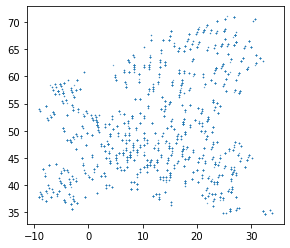

In [53]:
gdf.plot(markersize=0.1)

In [30]:
lats

site
2128_N_17      60.958271
2128_N_25      60.958271
2128_N_32      60.958271
2128_N_44      60.958271
2128_S_18      60.958271
2128_S_25      60.958271
2128_S_32      60.958271
2128_S_43      60.958271
2128_W_18      60.958271
2128_W_25      60.958271
17_E_26        37.978351
17_E_33        37.978351
17_E_44        37.978351
17_N_17        37.978351
17_N_25        37.978351
17_N_32        37.978351
17_N_44        37.978351
17_S_18        37.978351
17_S_25        37.978351
17_S_32        37.978351
981_E_44       59.040543
981_N_17       59.040543
981_N_25       59.040543
981_N_32       59.040543
981_N_44       59.040543
981_S_18       59.040543
981_S_25       59.040543
981_S_32       59.040543
981_S_43       59.040543
981_W_18       59.040543
                 ...    
1037_E_26      59.496880
1037_E_33      59.496880
1037_E_44      59.496880
1037_N_17      59.496880
1037_N_25      59.496880
1037_N_32      59.496880
1037_N_44      59.496880
1037_S_18      59.496880
1037_S_25      59.49

In [56]:
np.array(0.1) / np.array(0)

/cluster/work/apatt/brynmorp/miniconda/envs/wind-var-calliope/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


inf